In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing Dataset
df=pd.read_csv('supermarket.csv')

In [4]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,6/9/2015,West,791,0.23,181.93,Tamil Nadu
1,OD28,Jackson,Bakery,Biscuits,Viluppuram,9/17/2016,East,979,0.22,401.39,Tamil Nadu
2,OD45,Amrish,Bakery,Biscuits,Krishnagiri,3/11/2017,Central,1663,0.17,731.72,Tamil Nadu
3,OD141,Veena,Bakery,Biscuits,Perambalur,9/5/2017,East,866,0.32,381.04,Tamil Nadu
4,OD245,Roshan,Bakery,Biscuits,Coimbatore,6/1/2015,Central,817,0.15,326.80,Tamil Nadu


In [5]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9907,Adavan,Snacks,Noodles,Salem,3/11/2018,East,2087,0.13,313.05,Tamil Nadu
9990,OD9936,Anu,Snacks,Noodles,Namakkal,10/24/2017,South,1411,0.16,395.08,Tamil Nadu
9991,OD9948,Hafiz,Snacks,Noodles,Perambalur,11/3/2016,West,2053,0.13,882.79,Tamil Nadu
9992,OD9969,Hafiz,Snacks,Noodles,Chennai,3/6/2018,West,1981,0.23,614.11,Tamil Nadu
9993,OD9972,Ridhesh,Snacks,Noodles,Perambalur,10/2/2018,West,940,0.22,253.80,Tamil Nadu


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
#There is no null values in our dataset
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [11]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [15]:
df['month']=df['Order Date'].dt.month

In [16]:
df['year']=df['Order Date'].dt.year

In [17]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month,year
0,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,6,2015
1,OD28,Jackson,Bakery,Biscuits,Viluppuram,2016-09-17,East,979,0.22,401.39,Tamil Nadu,9,2016
2,OD45,Amrish,Bakery,Biscuits,Krishnagiri,2017-03-11,Central,1663,0.17,731.72,Tamil Nadu,3,2017
3,OD141,Veena,Bakery,Biscuits,Perambalur,2017-09-05,East,866,0.32,381.04,Tamil Nadu,9,2017
4,OD245,Roshan,Bakery,Biscuits,Coimbatore,2015-06-01,Central,817,0.15,326.80,Tamil Nadu,6,2015


In [41]:
df['month_year']=df['Order Date'].apply(lambda x:x.strftime('%y -%m'))

In [42]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month,year,month_year
0,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,6,2015,15 -06
1,OD28,Jackson,Bakery,Biscuits,Viluppuram,2016-09-17,East,979,0.22,401.39,Tamil Nadu,9,2016,16 -09
2,OD45,Amrish,Bakery,Biscuits,Krishnagiri,2017-03-11,Central,1663,0.17,731.72,Tamil Nadu,3,2017,17 -03
3,OD141,Veena,Bakery,Biscuits,Perambalur,2017-09-05,East,866,0.32,381.04,Tamil Nadu,9,2017,17 -09
4,OD245,Roshan,Bakery,Biscuits,Coimbatore,2015-06-01,Central,817,0.15,326.80,Tamil Nadu,6,2015,15 -06


In [50]:
month_year_sales=df.groupby('month_year').sum()['Sales']

In [55]:
month_year_sales=month_year_sales.reset_index()

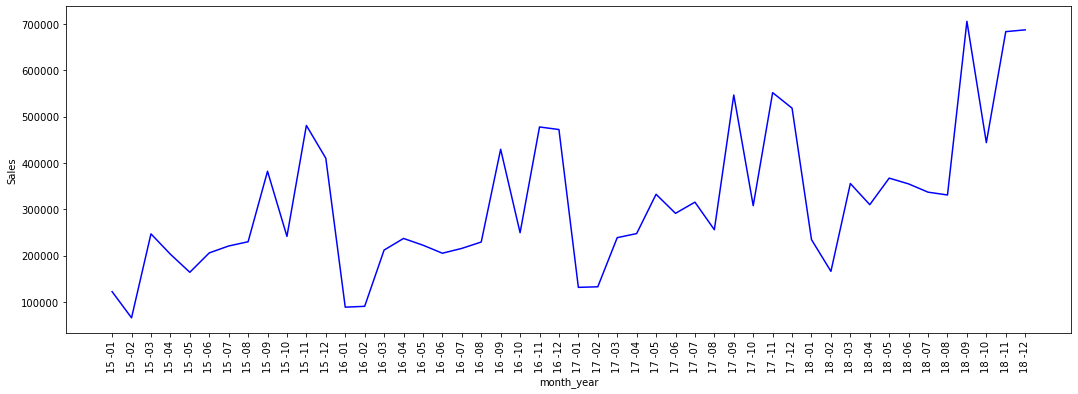

In [64]:
plt.figure(figsize=(18,6))
sns.lineplot(data=month_year_sales,x='month_year',y='Sales',color='blue')
plt.xticks(rotation=90)
plt.show()

                                             Overall sales trend month and year wise

In [72]:
selling_products=df.groupby(['Category','Sub Category']).sum()['Sales'].reset_index().sort_values('Sales')

In [73]:
selling_products[:10]

,Category,Sub Category,Sales
12,Food Grains,Rice,498323
15,Fruits & Veggies,Organic Fruits,503402
16,Fruits & Veggies,Organic Vegetables,520271
5,"Eggs, Meat & Fish",Chicken,520497
10,Food Grains,Dals & Pulses,523371
14,Fruits & Veggies,Fresh Vegetables,525842
9,Food Grains,Atta & Flour,534649
13,Fruits & Veggies,Fresh Fruits,551212
11,Food Grains,Organic Staples,558929
7,"Eggs, Meat & Fish",Fish,560548


 # Top 10 selling products with thier category ^

In [80]:
profitable_products=df.groupby(['Category','Sub Category']).sum()['Profit'].reset_index()

In [86]:
profitable_products=profitable_products.sort_values('Profit')

In [87]:
profitable_products[:10]

,Category,Sub Category,Profit
5,"Eggs, Meat & Fish",Chicken,124049.89
12,Food Grains,Rice,126932.36
9,Food Grains,Atta & Flour,127861.10
10,Food Grains,Dals & Pulses,130232.29
15,Fruits & Veggies,Organic Fruits,130862.33
14,Fruits & Veggies,Fresh Vegetables,131273.33
16,Fruits & Veggies,Organic Vegetables,133596.37
13,Fruits & Veggies,Fresh Fruits,134668.35
11,Food Grains,Organic Staples,144136.89
6,"Eggs, Meat & Fish",Eggs,144669.92


# Top 10 profitable Products with thier category ^

In [93]:
category=df.groupby(['Category']).sum()['Profit'].reset_index()

<AxesSubplot:xlabel='Category', ylabel='Profit'>

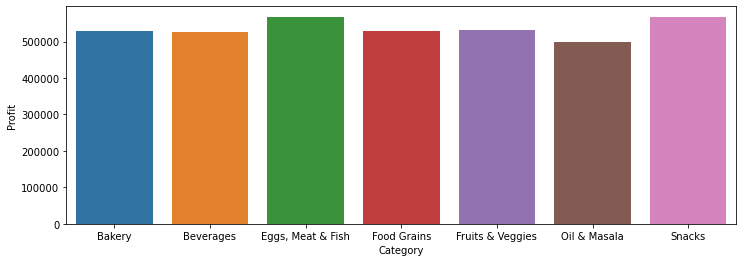

In [96]:
plt.figure(figsize=[12,4])
sns.barplot(data=category,x='Category',y='Profit')

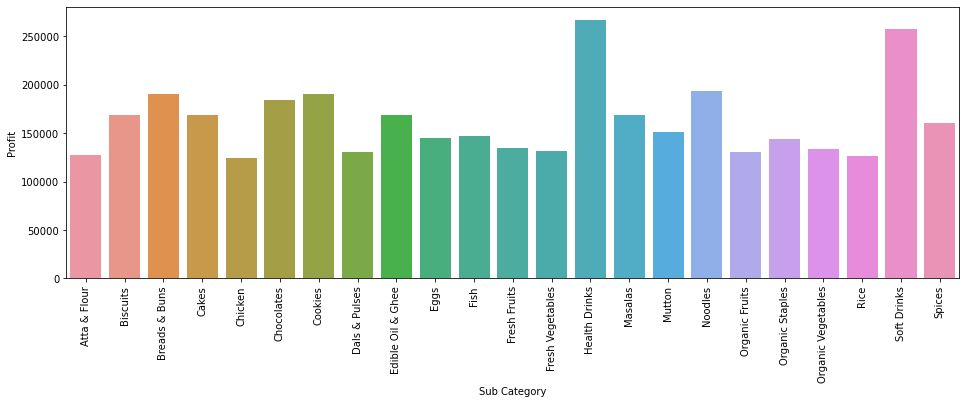

In [144]:
s_Category=df.groupby('Sub Category').sum()['Profit'].reset_index()
plt.figure(figsize=(16,5))
sns.barplot(data=s_Category,x='Sub Category',y='Profit')
plt.xticks(rotation=90)
plt.show()

In [101]:
df.corr()['Sales']

Sales       1.000000
Discount   -0.005512
Profit      0.605349
month      -0.009518
year        0.007542
Name: Sales, dtype: float64

# Correlation between sales and profit are more ^

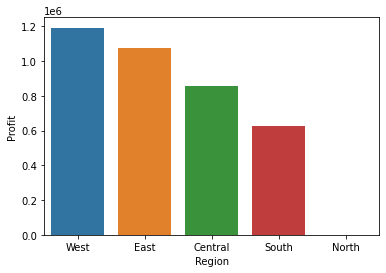

In [138]:
region=df.groupby('Region').sum().reset_index().loc[:,['Region','Sales','Profit']].sort_values('Profit',ascending=False)
sns.barplot(data=region,x='Region',y='Profit')
plt.show()

# Region wise Report ^

In [135]:
city=df.groupby(['City']).sum().reset_index()


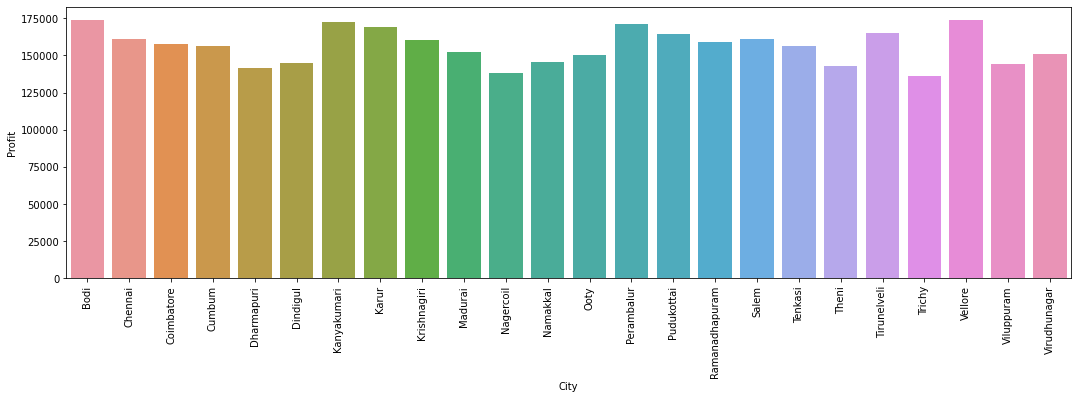

In [134]:
plt.figure(figsize=(18,5))
sns.barplot(data=city,x='City',y='Profit')
plt.xticks(rotation=90)
plt.show()

   # City wise  Report ^